<a href="https://colab.research.google.com/github/SHAHAB-UDDIN54/Artificial-intelligence-Ai-projects/blob/main/Clean_%26_Lean%E2%80%9D_Unsupervised_Learning_Pipeline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv("/content/customers dataset.csv")
dataset.head(5)

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
0,1,Male,19,15000,39,Healthcare,1,4
1,2,Male,21,35000,81,Engineer,3,3
2,3,Female,20,86000,6,Engineer,1,1
3,4,Female,23,59000,77,Lawyer,0,2
4,5,Female,31,38000,40,Entertainment,2,6


In [4]:
dataset.shape

(2000, 8)

In [5]:
dataset.isnull().sum()

,0
CustomerID,0
Gender,0
Age,0
Annual Income ($),0
Spending Score (1-100),0
Profession,35
Work Experience,0
Family Size,0


In [9]:
dataset['Profession'].fillna(dataset['Profession'].mode()[0],inplace=True)

In [10]:
dataset.isnull().sum()

,0
CustomerID,0
Gender,0
Age,0
Annual Income ($),0
Spending Score (1-100),0
Profession,0
Work Experience,0
Family Size,0


In [11]:
from sklearn.preprocessing import StandardScaler

In [12]:
dataset_clean = dataset.drop("CustomerID",axis=1)

In [13]:
x = dataset_clean[["Age","Annual Income ($)","Spending Score (1-100)"]]

In [14]:
scaler = StandardScaler()

In [16]:
x_scaled = scaler.fit_transform(x)

apply K means (assume k = 3)


In [17]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [18]:
kmeans = KMeans(n_clusters=3,random_state=42)

In [19]:
kmeans.fit(x_scaled)

KMeans(n_clusters=3, random_state=42)

In [20]:
labels = kmeans.labels_

In [21]:
inertia = kmeans.inertia_

In [22]:
sil_score = silhouette_score(x_scaled,labels)

print("Inertia:",inertia)
print("Sillhoutter score",sil_score)

Inertia: 3497.971678414158
Sillhoutter score 0.2531925314082644


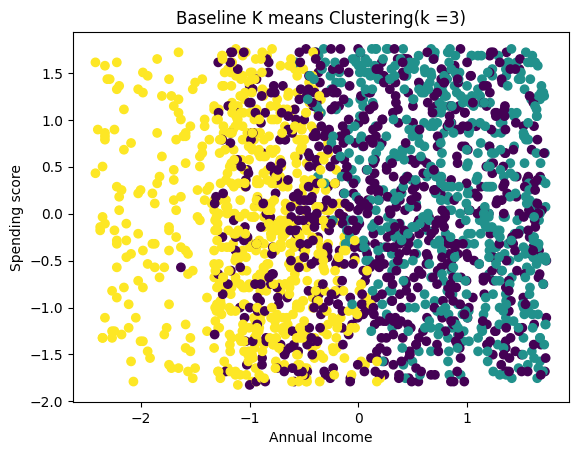

In [24]:
plt.scatter (
    x_scaled[:,1],
    x_scaled[:,2],
    c=labels
)

plt.xlabel("Annual Income")
plt.ylabel("Spending score")
plt.title("Baseline K means Clustering(k =3)")
plt.show()

ELBOW METHOD (K = 2 TO 10


In [26]:
inertia_values = []

for k in range(2,11):
  model = KMeans(n_clusters = k, random_state = 42)
  model.fit(x_scaled)
  inertia_values.append(model.inertia_)

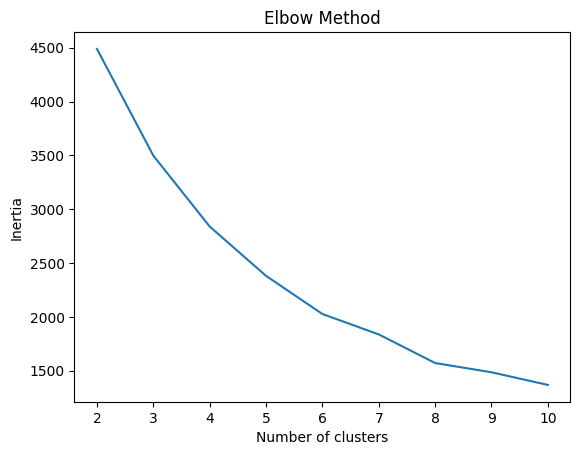

In [27]:
plt.plot(range(2,11),inertia_values)
plt.xlabel("Number of clusters")
plt.ylabel("Inertia")
plt.title("Elbow Method")
plt.show()

In [31]:
silhouette_scores_list = []
from sklearn.metrics import silhouette_score # Ensure the function is not shadowed
for k in range(2,11):
  model  = KMeans(n_clusters = k,random_state = 42)
  label = model.fit_predict(x_scaled)
  score = silhouette_score(x_scaled,label) # Use 'label' from current iteration
  silhouette_scores_list.append(score)

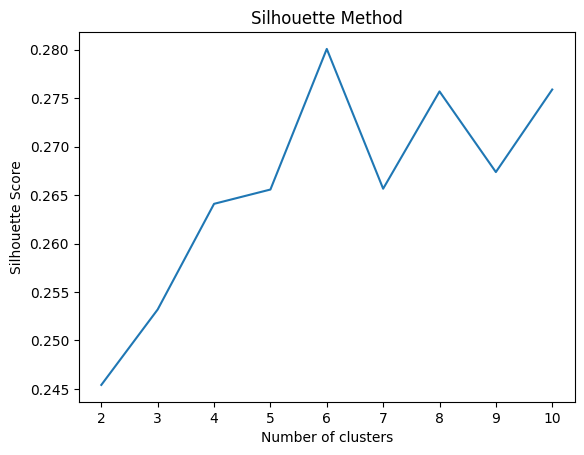

In [32]:
plt.plot(range(2,11),silhouette_scores_list)
plt.xlabel("Number of clusters")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Method")
plt.show()

In [34]:
optimal_k = 4

final_kmeans = KMeans(n_clusters=optimal_k, random_state=42)
final_labels = final_kmeans.fit_predict(x_scaled)


In [36]:
from sklearn.cluster import AgglomerativeClustering

agglo = AgglomerativeClustering(
    n_clusters=4,
    linkage="ward"
)

agglo_labels = agglo.fit_predict(x_scaled)


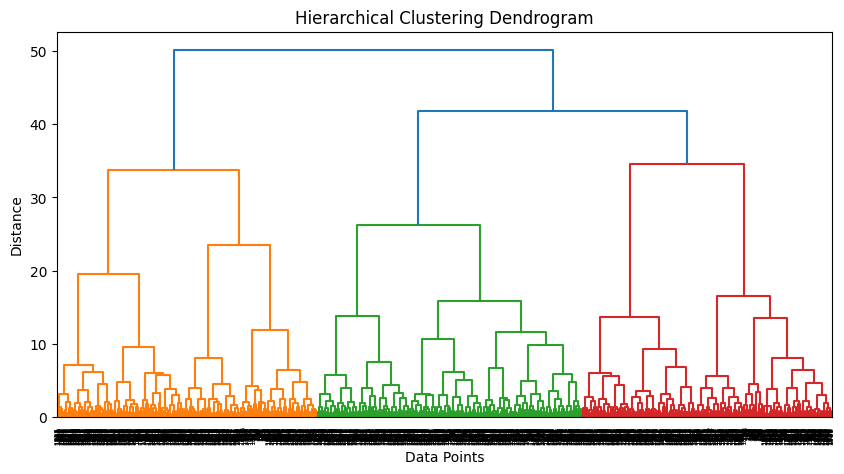

In [37]:
from scipy.cluster.hierarchy import dendrogram, linkage

linked = linkage(x_scaled, method="ward")

plt.figure(figsize=(10, 5))
dendrogram(linked)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Data Points")
plt.ylabel("Distance")
plt.show()
